In [11]:
import numpy as np
import xarray as xr
from xmitgcm import open_mdsdataset
import pandas as pd
import os.path as op
from xgcm.grid import Grid
import csv
import pandas as pd
from floater import utils
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
indir = '/swot/SUM01/takaya/ftle/'
outdir = '/swot/SUM01/takaya/ftle/runs/'

In [ ]:
utils.floats_to_netcdf(input_dir=op.join(indir,'runs/whole-domain'),
                      output_fname='float_trajectories',
                      float_file_prefix='float_trajectories',
                      output_dir=op.join(outdir,'002'),
                      output_prefix='float_trajectories',
                      pkl_path=op.join(indir,'input/floatset_200m_2d_x2000-y2000.pkl'))

 77%|███████▋  | 24/31 [56:43<17:21, 148.73s/it]

In [18]:
ds = xr.open_dataset(op.join(outdir,'002/float_trajectories_netcdf/float_trajectories.0000001440.nc'))
ds

<xarray.Dataset>
Dimensions:  (time: 1, x0: 9995, y0: 9995)
Coordinates:
  * y0       (y0) float32 600.0 800.0 1000.0 ... 1999000.0 1999200.0 1999400.0
  * x0       (x0) float32 600.0 800.0 1000.0 ... 1999000.0 1999200.0 1999400.0
  * time     (time) int32 2592000
Data variables:
    x        (time, y0, x0) float32 ...
    y        (time, y0, x0) float32 ...
    z        (time, y0, x0) float32 ...
    u        (time, y0, x0) float32 ...
    v        (time, y0, x0) float32 ...
    vort     (time, y0, x0) float32 ...
    lavd     (time, y0, x0) float32 ...

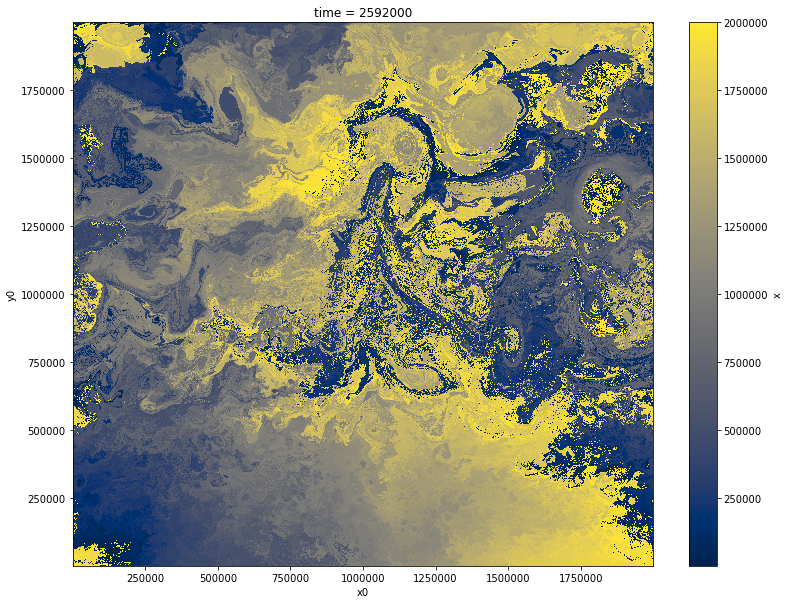

In [19]:
fig, ax = plt.subplots(figsize=(13,10))
ds.x[-1].plot(ax=ax, cmap='cividis')
# ds.x[-1].plot.contour(ax=ax, levels=np.array([10e5]), colors='k', linewidths=2)

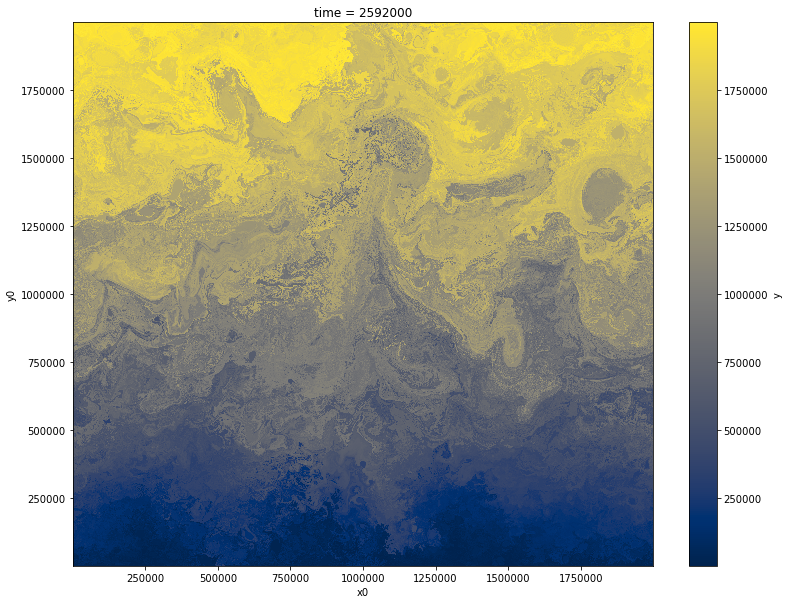

In [20]:
ds.y[-1].plot(cmap='cividis', figsize=(13,10))

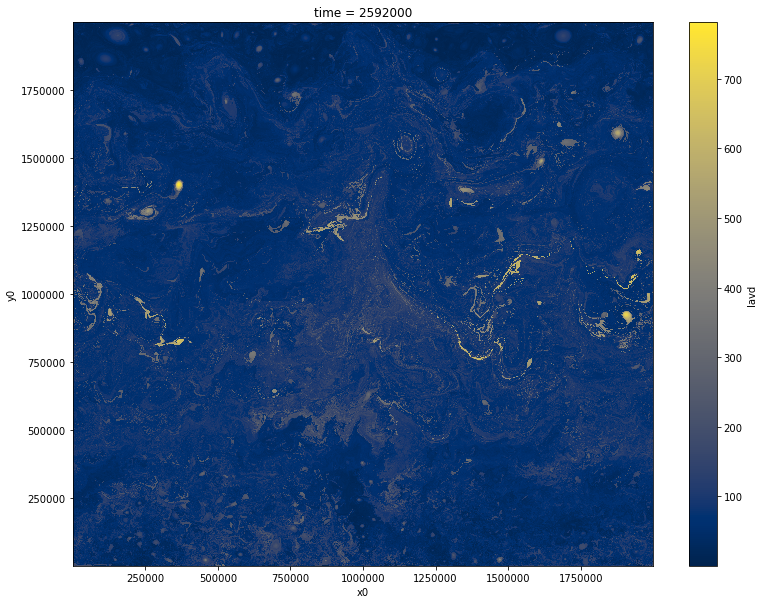

In [21]:
ds.lavd.plot(cmap='cividis', figsize=(13,10))

In [6]:
temp = ds.sel(x0=10e5, method='nearest').sel(y0=10e5, method='nearest')
temp

<xarray.Dataset>
Dimensions:  (time: 1)
Coordinates:
    y0       float32 1000000.0
    x0       float32 1000000.0
  * time     (time) int32 432000
Data variables:
    x        (time) float32 ...
    y        (time) float32 ...
    z        (time) float32 ...
    u        (time) float32 ...
    v        (time) float32 ...
    vort     (time) float32 ...
    lavd     (time) float32 ...

In [7]:
temp.x

<xarray.DataArray 'x' (time: 1)>
array([1012917.6], dtype=float32)
Coordinates:
    y0       float32 1000000.0
    x0       float32 1000000.0
  * time     (time) int32 432000

In [11]:
xtarget = 10e5
ytarget = 10e5
for i in range(0,800,48):
    ds = xr.open_dataset(op.join(outdir,'002/float_trajectories_netcdf/float_trajectories.%010d.nc' % i)
                        ).sel(x0=xtarget, method='nearest').sel(y0=ytarget, method='nearest')

    db = {'time':np.asarray([18e2*i]),
          'x':ds.x.data,
          'y':ds.y.data
         }
    if i == 0:
        traj = pd.DataFrame(data=db)
    else:
        traj = traj.append(pd.DataFrame(data=db))
traj

,time,x,y
0,0.0,1.000000e+06,1.000000e+06
0,86400.0,1.008202e+06,1.044314e+06
0,172800.0,9.999833e+05,1.070207e+06
0,259200.0,9.962231e+05,1.089374e+06
0,345600.0,1.003320e+06,1.100068e+06
0,432000.0,1.012918e+06,1.113152e+06
0,518400.0,1.023141e+06,1.125244e+06
0,604800.0,1.034841e+06,1.136178e+06
0,691200.0,1.052491e+06,1.131860e+06
0,777600.0,1.095058e+06,1.069982e+06


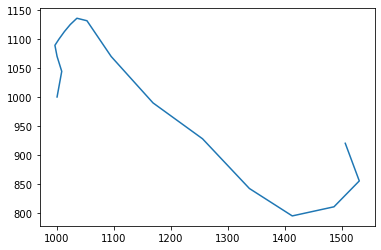

In [12]:
fig, ax = plt.subplots()
ax.plot(traj.x*1e-3, traj.y*1e-3)

# Let's try 5 days

In [70]:
iters = np.arange(0,(24*10)+1,48)
for i in iters:
    ds = xr.open_dataset(op.join(outdir,'002/float_trajectories_netcdf/float_trajectories.000000%04d.nc' % int(i)))
    if i == 0:
        data = ds
    else:
        data = xr.concat([data,ds], dim='time')
data

<xarray.Dataset>
Dimensions:  (time: 6, x0: 9995, y0: 9995)
Coordinates:
  * y0       (y0) float32 600.0 800.0 1000.0 ... 1999000.0 1999200.0 1999400.0
  * x0       (x0) float32 600.0 800.0 1000.0 ... 1999000.0 1999200.0 1999400.0
  * time     (time) int64 0 86400 172800 259200 345600 432000
Data variables:
    x        (time, y0, x0) float32 600.0 800.0 1000.0 ... 13333.71 13470.019
    y        (time, y0, x0) float32 600.0 600.0 600.0 ... 1999111.8 1999116.4
    z        (time, y0, x0) float32 -0.5 -0.5 -0.5 -0.5 ... -0.5 -0.5 -0.5 -0.5
    u        (time, y0, x0) float32 0.0034821797 0.003540936 ... 0.05605092
    v        (time, y0, x0) float32 0.0 0.0 0.0 ... -0.0003429482 -0.0002447883
    vort     (time, y0, x0) float32 0.0 0.0 0.0 ... 1.0152e-06 9.774843e-07
    lavd     (time, y0, x0) float32 0.0 0.0 0.0 ... 3.470008 3.605359 3.6966426

In [102]:
with ProgressBar():
    data.load()

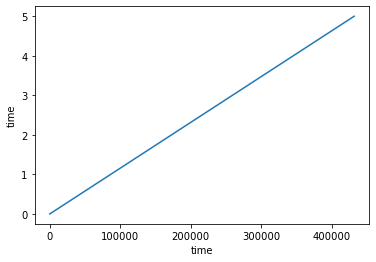

In [71]:
(data.time*86400**-1).plot()

In [72]:
dt = 40
df = int(3600/40)
dfend = 378000
ds = open_mdsdataset('/swot/SUM04/dbalwada/channel_beta/01km/tracer_exp2',
                    iters = np.arange(int(dfend-31*86400/dt),int(dfend-(31-5)*86400/dt+df),int(df*24)),
                    prefix=['W','T','PTRACER01'], delta_t=dt
                    )
ds

/home/takaya/.conda/envs/ftle2/lib/python3.6/site-packages/xmitgcm-0.3.0+4.g5324648-py3.6.egg/xmitgcm/mds_store.py:162: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if iters == 'all':
/home/takaya/.conda/envs/ftle2/lib/python3.6/site-packages/xmitgcm-0.3.0+4.g5324648-py3.6.egg/xmitgcm/mds_store.py:217: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  ds = xr.auto_combine(datasets)
/home/takaya/.conda/envs/ftle2/lib/python3.6/site-packages/xmitgcm-0.3.0+4.g5324648-py3.6.egg/xmitgcm/mds_store.py:217: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `com

<xarray.Dataset>
Dimensions:              (XC: 2000, XG: 2000, YC: 2000, YG: 2000, Z: 76, Zl: 76, Zp1: 77, Zu: 76, layer_1TH_bounds: 43, layer_1TH_center: 42, layer_1TH_interface: 41, time: 6)
Coordinates:
  * XC                   (XC) >f4 500.0 1500.0 2500.0 ... 1998500.0 1999500.0
  * YC                   (YC) >f4 500.0 1500.0 2500.0 ... 1998500.0 1999500.0
  * XG                   (XG) >f4 0.0 1000.0 2000.0 ... 1998000.0 1999000.0
  * YG                   (YG) >f4 0.0 1000.0 2000.0 ... 1998000.0 1999000.0
  * Z                    (Z) >f4 -0.5 -1.57 -2.79 ... -2757.325 -2912.665
  * Zp1                  (Zp1) >f4 0.0 -1.0 -2.14 ... -2689.32 -2825.33 -3000.0
  * Zu                   (Zu) >f4 -1.0 -2.14 -3.44 ... -2689.32 -2825.33 -3000.0
  * Zl                   (Zl) >f4 0.0 -1.0 -2.14 ... -2562.59 -2689.32 -2825.33
    rA                   (YC, XC) >f4 dask.array<shape=(2000, 2000), chunksize=(2000, 2000)>
    dxG                  (YG, XC) >f4 dask.array<shape=(2000, 2000), chunksize

[########################################] | 100% Completed |  2.9s
[########################################] | 100% Completed |  2.8s


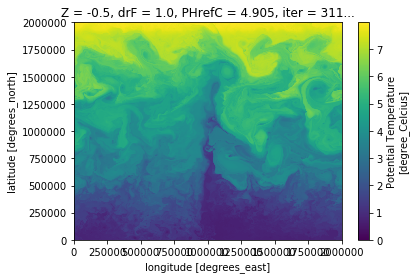

In [91]:
from dask.diagnostics import ProgressBar
with ProgressBar():
    SSC = ds.PTRACER01[:,0].load()
    SST = ds['T'][:,0].load()

SST[0].plot()

In [ ]:
dSSC = 0.*SSC[1:].copy()
dSST = 0.*SST[1:].copy()
nSSC = dSSC.copy()
nSST = dSST.copy()

for j in range(1,len(data.y0),3):
    print(data.y0[j])
    for i in range(1,len(data.x0),3):
        for tt in range(len(dSSC.time)):
            dtime = 24.*3600 * (tt+1)
            for ttt in range(int(tt+1),6):
                x0 = data.x[ttt-(tt+1),j,i]
                y0 = data.y[ttt-(tt+1),j,i]
                x1 = data.x[ttt,j,i]
                y1 = data.y[ttt,j,i]
                iy0 = np.argmin(np.abs(ds.YC-y0))
                ix0 = np.argmin(np.abs(ds.XC-x0))
                iy1 = np.argmin(np.abs(ds.YC-y1))
                ix1 = np.argmin(np.abs(ds.XC-x1))
                C0 = SSC[ttt-(tt+1),iy0,ix0]
                T0 = SST[ttt-(tt+1),iy0,ix0]
                C1 = SSC[ttt,iy1,ix1]
                T1 = SST[ttt,iy1,ix1]
                dSSC[tt,iy0,ix0] += (-C0.values + C1.values) * dtime**-1
                dSST[tt,iy0,ix0] += (-T0.values + T1.values) * dtime**-1
                nSSC[tt,iy0,ix0] += 1
                nSST[tt,iy0,ix0] += 1     

<xarray.DataArray 'y0' ()>
array(800., dtype=float32)
Coordinates:
    y0       float32 800.0
<xarray.DataArray 'y0' ()>
array(1400., dtype=float32)
Coordinates:
    y0       float32 1400.0
<xarray.DataArray 'y0' ()>
array(2000., dtype=float32)
Coordinates:
    y0       float32 2000.0
<xarray.DataArray 'y0' ()>
array(2600., dtype=float32)
Coordinates:
    y0       float32 2600.0
<xarray.DataArray 'y0' ()>
array(3200., dtype=float32)
Coordinates:
    y0       float32 3200.0
<xarray.DataArray 'y0' ()>
array(3800., dtype=float32)
Coordinates:
    y0       float32 3800.0
<xarray.DataArray 'y0' ()>
array(4400., dtype=float32)
Coordinates:
    y0       float32 4400.0
<xarray.DataArray 'y0' ()>
array(5000., dtype=float32)
Coordinates:
    y0       float32 5000.0
<xarray.DataArray 'y0' ()>
array(5600., dtype=float32)
Coordinates:
    y0       float32 5600.0
<xarray.DataArray 'y0' ()>
array(6200., dtype=float32)
Coordinates:
    y0       float32 6200.0
<xarray.DataArray 'y0' ()>
array(6800., dt

In [ ]:
dSSC